In [1]:
import numpy as np
import keras
from keras import layers
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

2025-08-13 16:19:15.736096: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-13 16:19:15.745646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755082155.756994  682576 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755082155.760678  682576 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755082155.769544  682576 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Q1. Understanding the Dataset and Pre-processing: Implement the following:
a. Compute and display the number of classes.
b. Compute and display the dimensions of each image.
c. Display one image from each class.
d. Perform normalization.

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Shape check
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Image Display

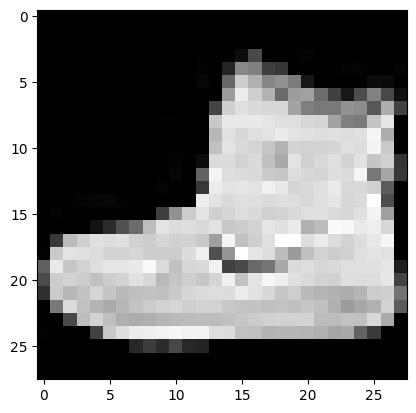

In [3]:
plt.imshow(x_train[0],cmap='gray')

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [5]:
y_train.shape

(60000,)

In [ ]:
for i, c in enumerate(classes):
    idx = np.where(y_train == c)[0][0]  # first index of class c
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx])
    plt.title(str(c))
    plt.axis('off')

Number of classes: 10
Image shape (H, W): (28, 28)


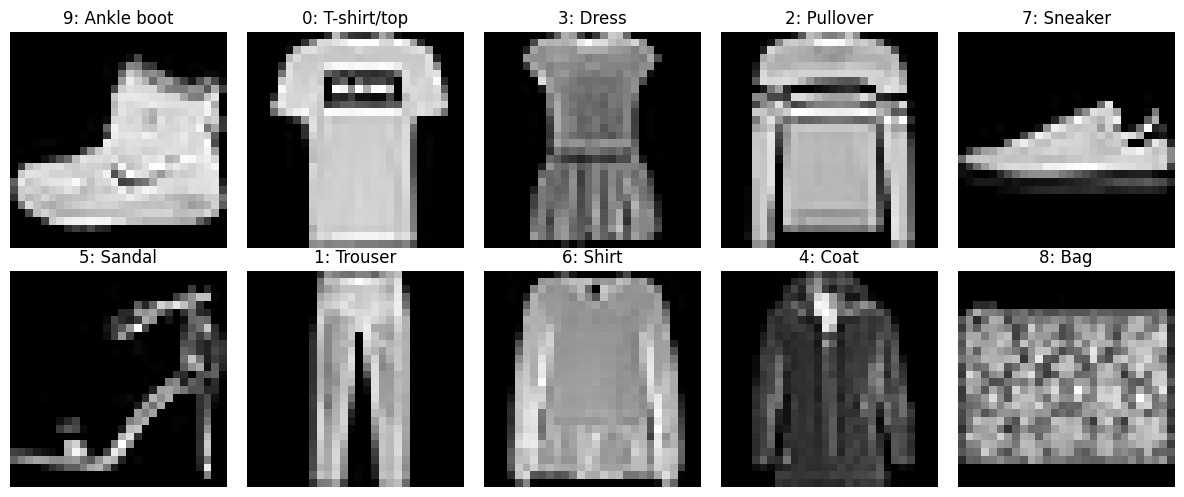

x_train: (60000, 28, 28) x_train_cnn: (60000, 28, 28, 1)
x_test: (10000, 28, 28) x_test_cnn: (10000, 28, 28, 1)


In [6]:
# Class names 
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# a) Number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# b) Image dimensions
print("Image shape (H, W):", x_train.shape[1:])

# c) Show one image per class
plt.figure(figsize=(12, 5))
shown = set()
cols = 10
for i in range(len(x_train)):
    label = y_train[i]
    if label not in shown:
        plt.subplot(2, 5, len(shown) + 1)
        plt.imshow(x_train[i], cmap='gray')
        plt.title(f"{label}: {class_names[label]}")
        plt.axis('off')
        shown.add(label)
    if len(shown) == num_classes:
        break
plt.tight_layout()
plt.show()

# d) Normalization (scale pixels to [0,1])
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# For CNNs, add channel dimension: (28,28) -> (28,28,1)
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn  = np.expand_dims(x_test, -1)

print("x_train:", x_train.shape, "x_train_cnn:", x_train_cnn.shape)
print("x_test:",  x_test.shape,  "x_test_cnn:",  x_test_cnn.shape)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [8]:
import time
import matplotlib.pyplot as plt

# Helper: plot training curves
def plot_curves(history, title="Training curves"):
    hist = history.history
    plt.figure(figsize=(12,4))
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(hist['accuracy'], label='train acc')
    plt.plot(hist['val_accuracy'], label='val acc')
    plt.title(title + " — Accuracy")
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
    # Loss
    plt.subplot(1,2,2)
    plt.plot(hist['loss'], label='train loss')
    plt.plot(hist['val_loss'], label='val loss')
    plt.title(title + " — Loss")
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
    plt.tight_layout()
    plt.show()

# Helper: compile/train/evaluate with early stopping & timing
def train_and_eval(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=128, title="Model"):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=3, restore_best_weights=True
        )
    ]
    start = time.time()
    history = model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=2
    )
    train_time = time.time() - start
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{title} — Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")
    print(f"{title} — Params: {model.count_params():,}, Train time ~ {train_time:.2f}s")
    plot_curves(history, title)
    return history, test_acc, test_loss, train_time


# FCNN 

/home/student/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1755082158.246304  682576 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10028 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40


I0000 00:00:1755082159.329830  682715 service.cc:152] XLA service 0x7f1ba800b280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755082159.329846  682715 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-08-13 16:19:19.345076: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1755082159.440211  682715 cuda_dnn.cc:529] Loaded cuDNN version 91100
2025-08-13 16:19:20.066006: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_170', 104 bytes spill stores, 104 bytes spill loads

2025-08-13 16:19:20.140521: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_340'

422/422 - 9s - 21ms/step - accuracy: 0.8118 - loss: 0.5361 - val_accuracy: 0.8573 - val_loss: 0.3966
Epoch 2/40
422/422 - 1s - 1ms/step - accuracy: 0.8650 - loss: 0.3744 - val_accuracy: 0.8693 - val_loss: 0.3593
Epoch 3/40
422/422 - 1s - 1ms/step - accuracy: 0.8770 - loss: 0.3373 - val_accuracy: 0.8730 - val_loss: 0.3423
Epoch 4/40
422/422 - 1s - 1ms/step - accuracy: 0.8858 - loss: 0.3088 - val_accuracy: 0.8697 - val_loss: 0.3609
Epoch 5/40
422/422 - 1s - 1ms/step - accuracy: 0.8920 - loss: 0.2910 - val_accuracy: 0.8863 - val_loss: 0.3110
Epoch 6/40
422/422 - 1s - 1ms/step - accuracy: 0.8985 - loss: 0.2739 - val_accuracy: 0.8845 - val_loss: 0.3119
Epoch 7/40
422/422 - 1s - 1ms/step - accuracy: 0.9016 - loss: 0.2612 - val_accuracy: 0.8857 - val_loss: 0.3221
Epoch 8/40
422/422 - 1s - 1ms/step - accuracy: 0.9069 - loss: 0.2497 - val_accuracy: 0.8885 - val_loss: 0.3127


2025-08-13 16:19:32.202550: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45', 12 bytes spill stores, 12 bytes spill loads

2025-08-13 16:19:32.744267: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_45', 4 bytes spill stores, 4 bytes spill loads



FCNN — Test accuracy: 0.8793, Test loss: 0.3383
FCNN — Params: 242,762, Train time ~ 13.11s


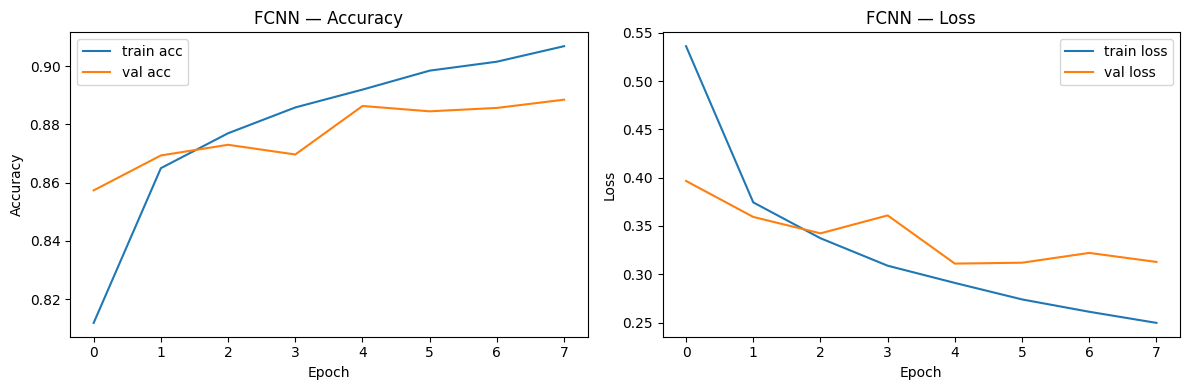

In [9]:
# Q2 — FCNN model
fcnn = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten image to 1D vector
    Dense(256, activation='relu'),          # First hidden layer
    Dense(128, activation='relu'),          # Second hidden layer
    Dense(64, activation='relu'),           # Third hidden layer
    Dense(10, activation='softmax')         # Output layer (10 classes)
])

fcnn.summary()

# Train & test (early stopping picks best epoch to avoid overfitting)
hist_fcnn, acc_fcnn, loss_fcnn, time_fcnn = train_and_eval(
   fcnn, x_train, y_train, x_test, y_test, epochs=40, batch_size=128, title="FCNN"
)



# CNN 1

Q3. Performing experiments on a Convolutional Neural Networks (CNNs):
a. Design CNN-1 which contains:
• One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0.
• One Pooling layer which uses MAXPOOLING with stride =2.
• One hidden layer having number of neurons = 100


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       460,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,742 (1.77 MB)

 Trainable params: 462,742 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


2025-08-13 16:19:38.806194: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_342', 32 bytes spill stores, 32 bytes spill loads



422/422 - 6s - 13ms/step - accuracy: 0.8245 - loss: 0.4987 - val_accuracy: 0.8718 - val_loss: 0.3703
Epoch 2/30
422/422 - 1s - 2ms/step - accuracy: 0.8824 - loss: 0.3294 - val_accuracy: 0.8940 - val_loss: 0.3034
Epoch 3/30
422/422 - 1s - 2ms/step - accuracy: 0.8972 - loss: 0.2865 - val_accuracy: 0.8945 - val_loss: 0.2978
Epoch 4/30
422/422 - 1s - 2ms/step - accuracy: 0.9076 - loss: 0.2586 - val_accuracy: 0.9027 - val_loss: 0.2690
Epoch 5/30
422/422 - 1s - 2ms/step - accuracy: 0.9153 - loss: 0.2372 - val_accuracy: 0.9008 - val_loss: 0.2793
Epoch 6/30
422/422 - 1s - 2ms/step - accuracy: 0.9205 - loss: 0.2192 - val_accuracy: 0.9108 - val_loss: 0.2507
Epoch 7/30
422/422 - 1s - 2ms/step - accuracy: 0.9251 - loss: 0.2040 - val_accuracy: 0.9068 - val_loss: 0.2637
Epoch 8/30
422/422 - 1s - 2ms/step - accuracy: 0.9321 - loss: 0.1882 - val_accuracy: 0.9095 - val_loss: 0.2538
Epoch 9/30
422/422 - 1s - 2ms/step - accuracy: 0.9369 - loss: 0.1746 - val_accuracy: 0.9100 - val_loss: 0.2503
Epoch 10/30

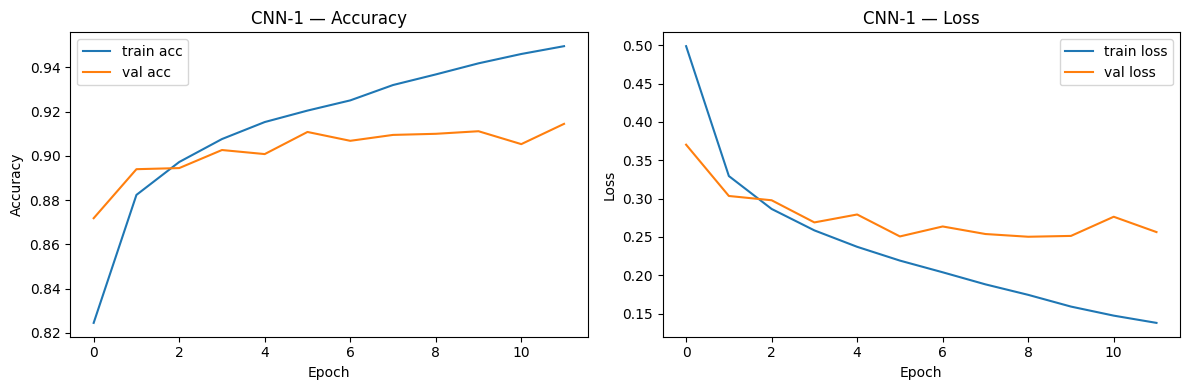

In [11]:
# Q3(a) — CNN-1
cnn1 = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (5,5), strides=1,activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn1.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

cnn1.summary()

hist_cnn1, acc_cnn1, loss_cnn1, time_cnn1 = train_and_eval(
    cnn1, x_train_cnn, y_train, x_test_cnn, y_test, epochs=30, batch_size=128, title="CNN-1"
)


# CNN2

b. Design CNN-2 which contains:
• Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1, 
and padding =0.
• One Pooling layer which uses MAXPOOLING with stride =2.
• One hidden layer having number of neurons = 100

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       460,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,478 (1.80 MB)

 Trainable params: 471,478 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
422/422 - 5s - 12ms/step - accuracy: 0.8369 - loss: 0.4638 - val_accuracy: 0.8850 - val_loss: 0.3281
Epoch 2/30
422/422 - 1s - 3ms/step - accuracy: 0.8959 - loss: 0.2908 - val_accuracy: 0.9012 - val_loss: 0.2720
Epoch 3/30
422/422 - 1s - 3ms/step - accuracy: 0.9125 - loss: 0.2398 - val_accuracy: 0.9072 - val_loss: 0.2610
Epoch 4/30
422/422 - 1s - 3ms/step - accuracy: 0.9241 - loss: 0.2078 - val_accuracy: 0.9068 - val_loss: 0.2542
Epoch 5/30
422/422 - 1s - 3ms/step - accuracy: 0.9343 - loss: 0.1803 - val_accuracy: 0.9148 - val_loss: 0.2408
Epoch 6/30
422/422 - 1s - 3ms/step - accuracy: 0.9432 - loss: 0.1557 - val_accuracy: 0.9172 - val_loss: 0.2282
Epoch 7/30
422/422 - 1s - 3ms/step - accuracy: 0.9492 - loss: 0.1373 - val_accuracy: 0.9033 - val_loss: 0.2847
Epoch 8/30
422/422 - 1s - 3ms/step - accuracy: 0.9572 - loss: 0.1185 - val_accuracy: 0.9193 - val_loss: 0.2404
Epoch 9/30
422/422 - 1s - 3ms/step - accuracy: 0.9641 - loss: 0.0986 - val_accuracy: 0.9125 - val_loss: 0.2618


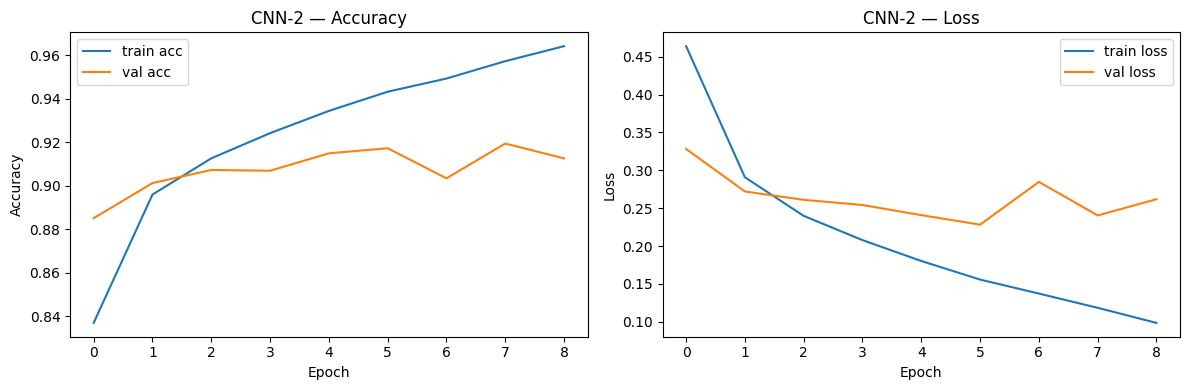

In [12]:
# Q3(b) — CNN-2
cnn2 = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), strides=1, activation='relu'),
    layers.Conv2D(32, (3,3), strides=1, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn2.summary()

hist_cnn2, acc_cnn2, loss_cnn2, time_cnn2 = train_and_eval(
    cnn2, x_train_cnn, y_train, x_test_cnn, y_test, epochs=30, batch_size=128, title="CNN-2"
)


# COMPARE FCNN AND CNN NETWORKS 

In [13]:
print("\n=== Accuracy Comparison ===")
print(f"FCNN : {acc_fcnn:.4f}")
print(f"CNN-1: {acc_cnn1:.4f}")
print(f"CNN-2: {acc_cnn2:.4f}")



=== Accuracy Comparison ===
FCNN : 0.8793
CNN-1: 0.9069
CNN-2: 0.9138


# COMPARING FCNN AND CNN

In [14]:
print("\n=== Parameter Counts ===")
print(f"FCNN  params: {fcnn.count_params():,}")
print(f"CNN-1 params: {cnn1.count_params():,}")
print(f"CNN-2 params: {cnn2.count_params():,}")



=== Parameter Counts ===
FCNN  params: 242,762
CNN-1 params: 462,742
CNN-2 params: 471,478


In [15]:
print("\n=== Training Time (approx) ===")
print(f"FCNN  time: {time_fcnn:.2f}s")
print(f"CNN-1 time: {time_cnn1:.2f}s")
print(f"CNN-2 time: {time_cnn2:.2f}s")



=== Training Time (approx) ===
FCNN  time: 13.11s
CNN-1 time: 15.58s
CNN-2 time: 16.39s


# CNN1 VS CNN2

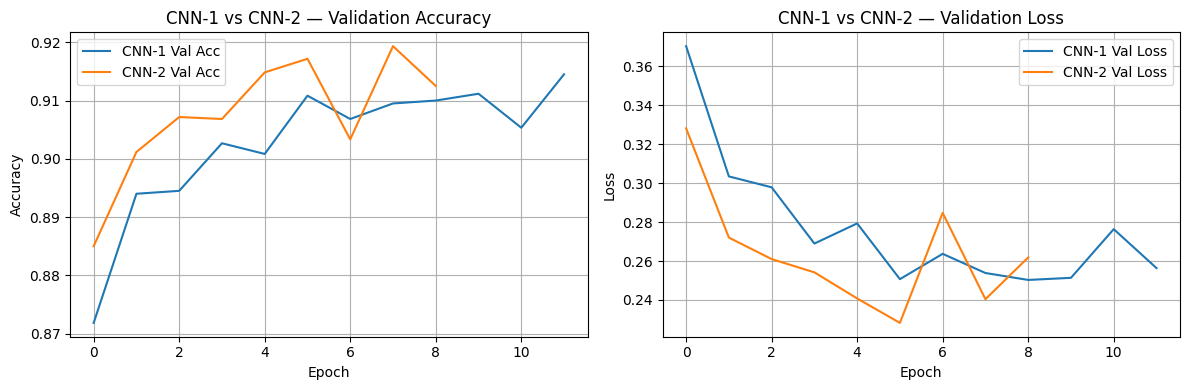

In [16]:
# Compare accuracy & loss curves of CNN-1 vs CNN-2
plt.figure(figsize=(12,4))

# Accuracy comparison
plt.subplot(1,2,1)
plt.plot(hist_cnn1.history['val_accuracy'], label='CNN-1 Val Acc')
plt.plot(hist_cnn2.history['val_accuracy'], label='CNN-2 Val Acc')
plt.title("CNN-1 vs CNN-2 — Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss comparison
plt.subplot(1,2,2)
plt.plot(hist_cnn1.history['val_loss'], label='CNN-1 Val Loss')
plt.plot(hist_cnn2.history['val_loss'], label='CNN-2 Val Loss')
plt.title("CNN-1 vs CNN-2 — Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
